# Global Power Plant Database Project

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database



The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field
geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data (number): year the capacity information was reported

generation_data_source (text): attribution for the reported generation information

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

# Task

Our task is to make two prediction for labels

1) primary_fuel

2) capacity_mw

# Import Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [269]:
df=pd.read_csv('global_power.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# EDA

# Check For Null values

In [272]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

The columns 'other_fuel1','other_fuel2', 'other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2019', 'generation_data_source','estimated_generation_gwh' have more than 50% of the data as null, so these columns are to be deleted.

In [273]:
df.drop(['other_fuel1','other_fuel2', 'other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2019', 'generation_data_source','estimated_generation_gwh'],axis=1, inplace=True)

In [274]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


# Drop columns with single values

Certain column seems to have only one value throughout the dataset which will not be much use to the target. So we will remove it.

In [275]:
one_value=dict()

for i in df.columns:
    if len(df[i].unique())==1:
        one_value.update({i: df[i].unique().tolist()})
        
print('Columns with single value: %s ' % one_value)

Columns with single value: {'country': ['IND'], 'country_long': ['India']} 


The columns Country and country_long has a single value, so it has no impact with the target variables. So deleting these columns.

The column 'gppd_idnr' is just an identifier for the power plant, the column 'name' has different values, which has no impact to the target variable.

In [276]:
df.drop(['country', 'country_long', 'gppd_idnr', 'name'], axis=1, inplace=True)

In [277]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


URL column is the website to the power plant, so it has no contribution to the target. So deleting the column.

In [278]:
df.drop('url', axis=1, inplace=True)

In [279]:
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [280]:
df.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [281]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [282]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [283]:
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

for column, dtypes in df.dtypes.items():
    if df[column].isnull().sum() > 0:
        if dtypes == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].mean())

In [284]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

<AxesSubplot:>

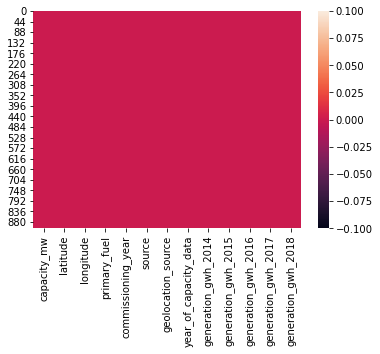

In [285]:
sns.heatmap(df.isnull())

The dataset has no null value. So we shall proceed with further analysis.

In [286]:
cat_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns

['primary_fuel', 'source', 'geolocation_source']

In [287]:
num_columns= [x for x in df.dtypes.index if df.dtypes[x] == 'float']
num_columns

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

# Target Variable: primary_fuel

In [288]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

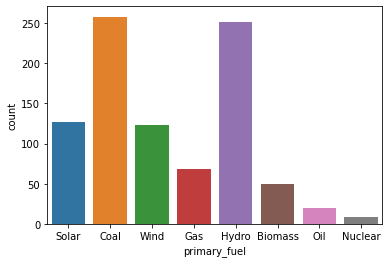

In [131]:
sns.countplot(df['primary_fuel'])

This shows the distribution of Primary_fuel from various sources.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

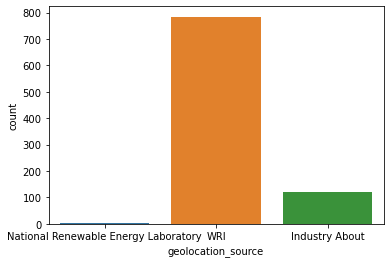

In [132]:
sns.countplot(df['geolocation_source'])

WRI sources are higher than other sources.

In [133]:
df['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Astonfield Management Limited                  1
Navbharat                                      1
Bannari Sugars ltd                             1
Sahakar Shiromani vasantrao                    1
Clean Energy edOjects.Com                      1
Name: source, Length: 191, dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

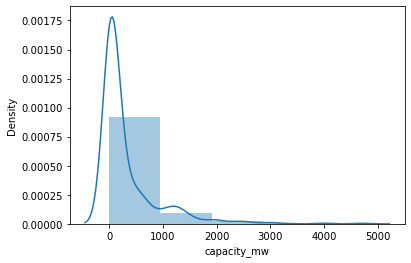

In [135]:
#capacity_mw
sns.distplot(df['capacity_mw'],bins=5)

This shows the distribution of power generation. around 1000mw power is generated mostly.

Numerical columns

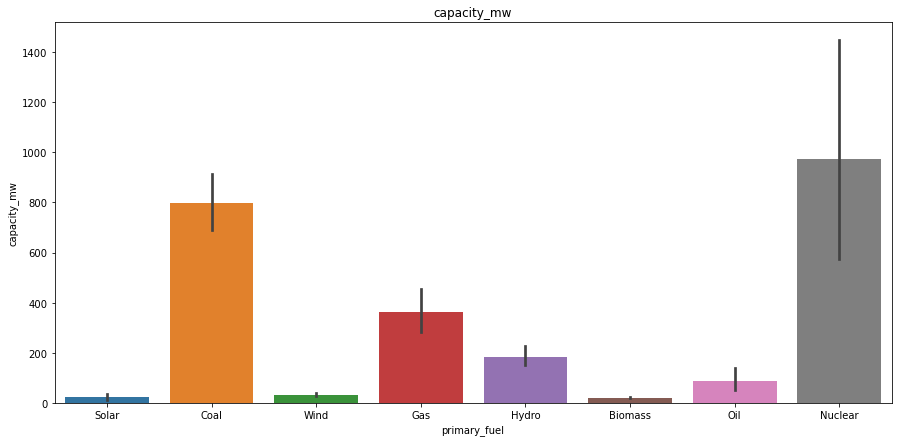

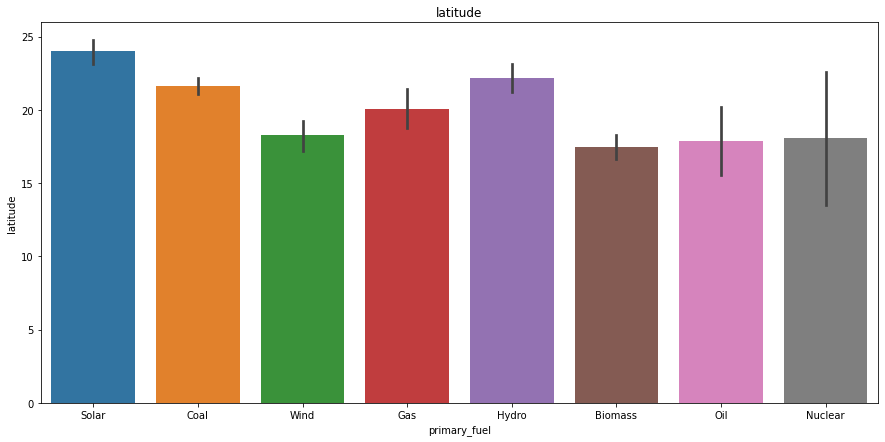

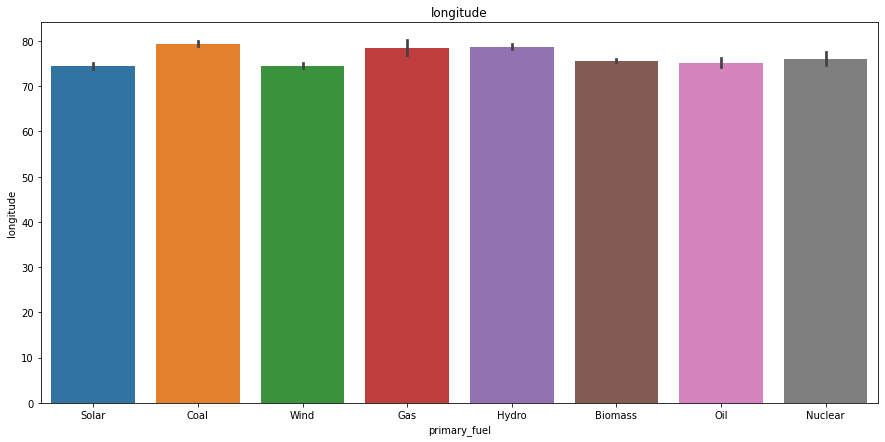

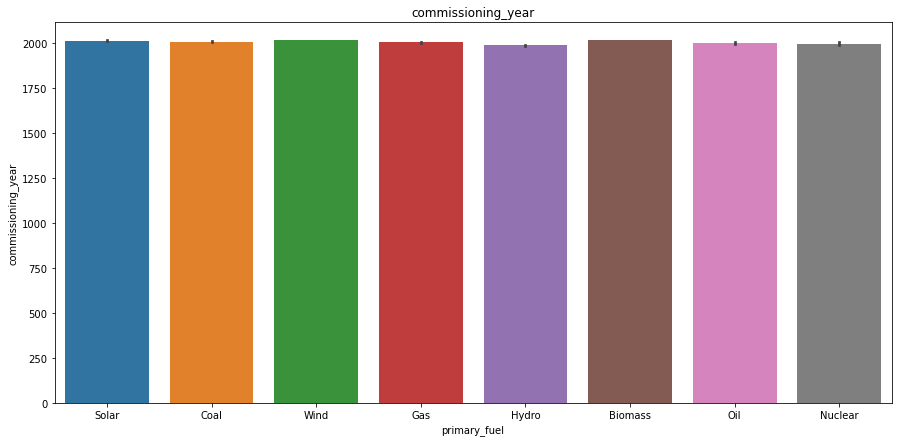

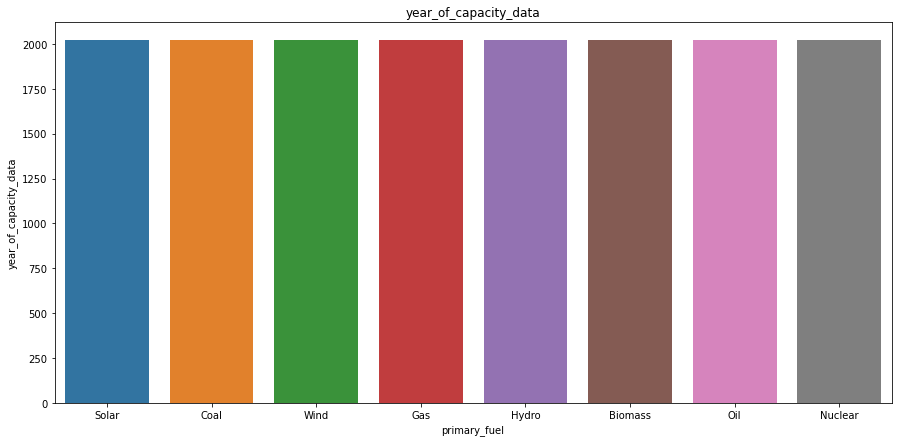

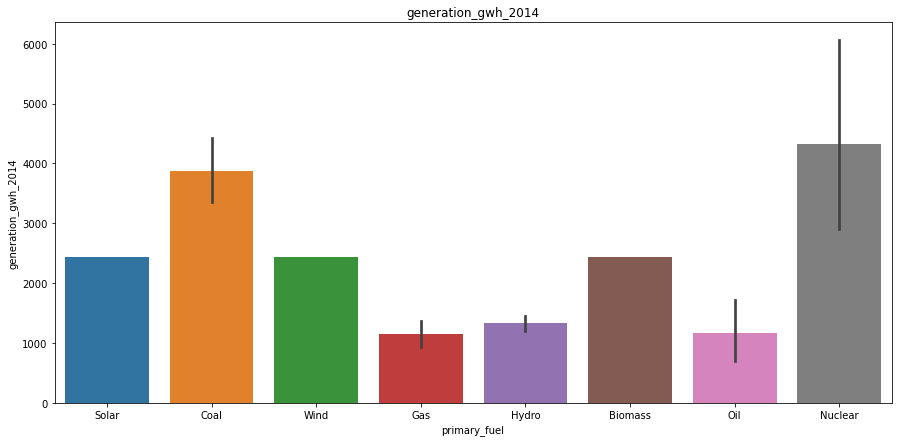

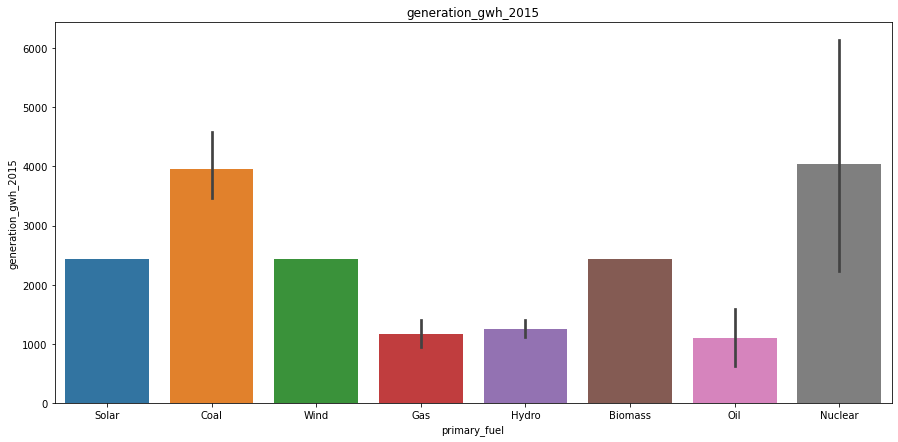

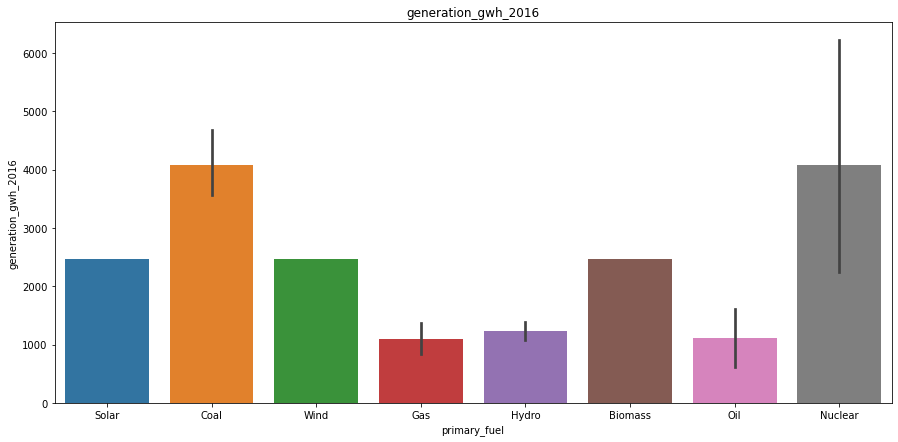

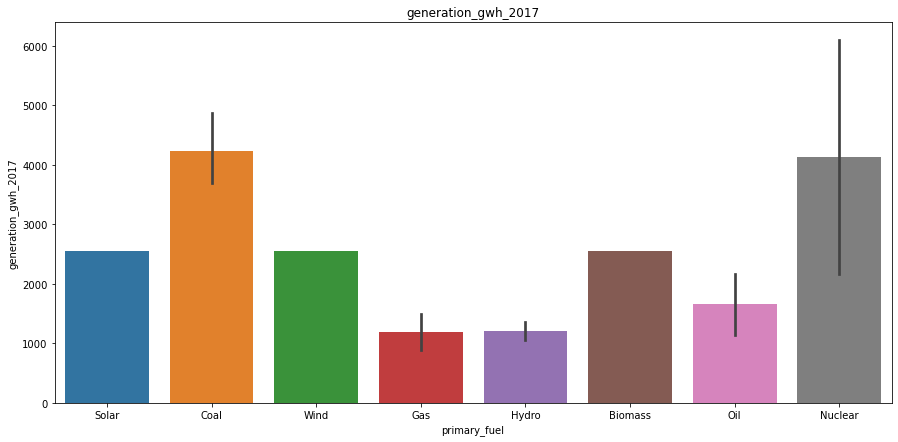

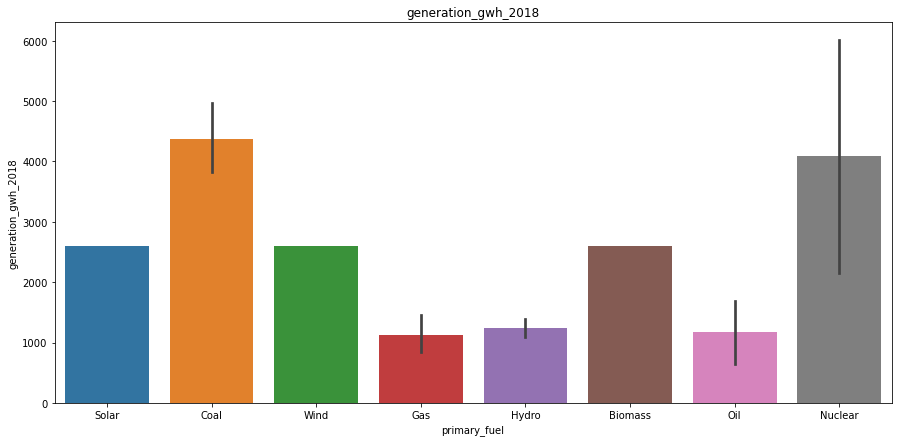

In [25]:
for i in num_columns:
    plt.figure(figsize=(15,7))
    sns.barplot(x=df['primary_fuel'],y= df[i], data=df)
    plt.title(i)
    plt.show()

With Nuclear and cola the electrical generating capacity is high.

With latitude, Solar and Hydro has higher counts.

Longitude is distributed throughout evenly.

The Elctricity generation for each year is high with Coal and Nuclear.

All fuel types are comissioned the same year.

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

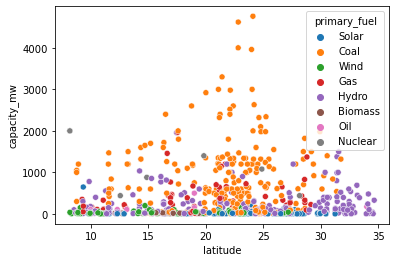

In [26]:
sns.scatterplot(x='latitude',y='capacity_mw',hue='primary_fuel',data =df)

Generation of electricity is high between latitude 20 to 25.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

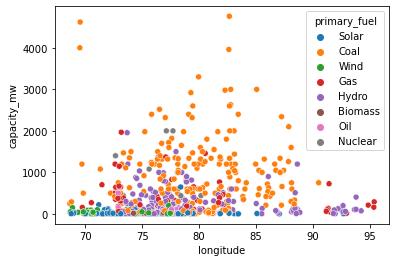

In [27]:
sns.scatterplot(x='longitude',y='capacity_mw',hue='primary_fuel',data =df)

Generation of electricity is high between longitude 80 to 85.

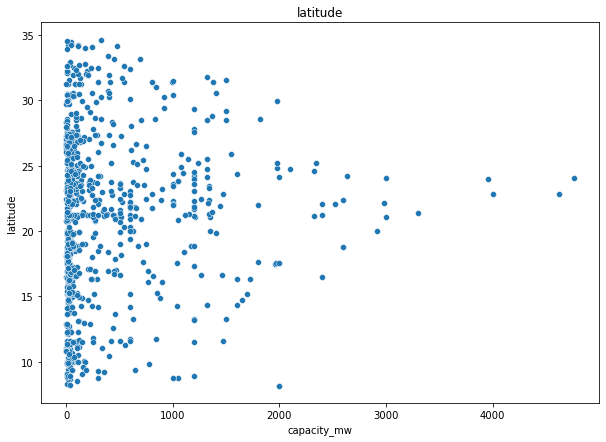

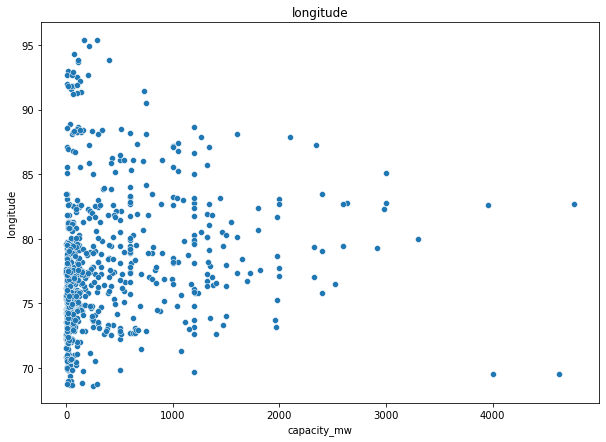

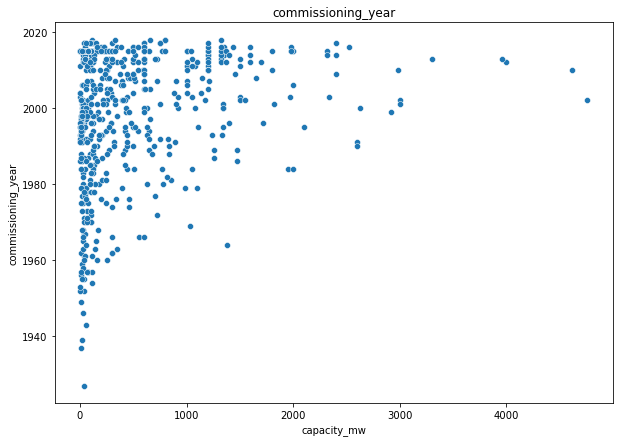

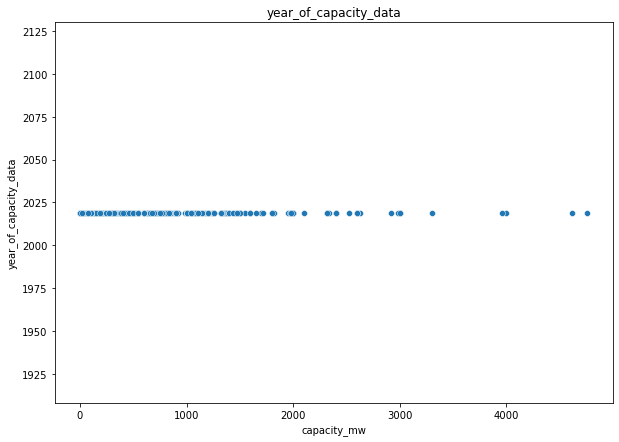

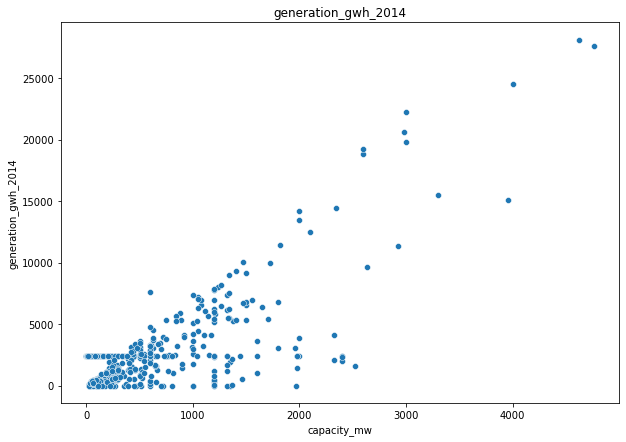

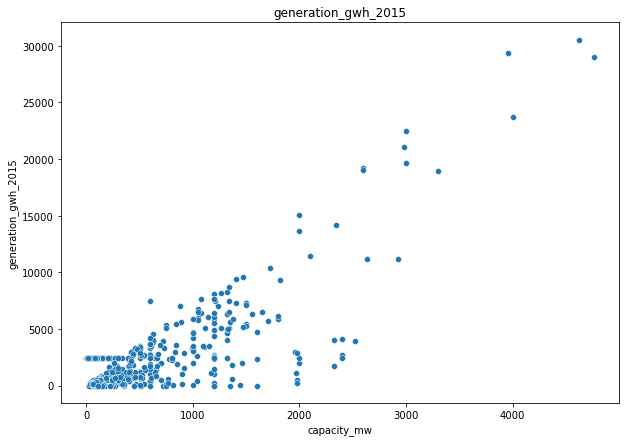

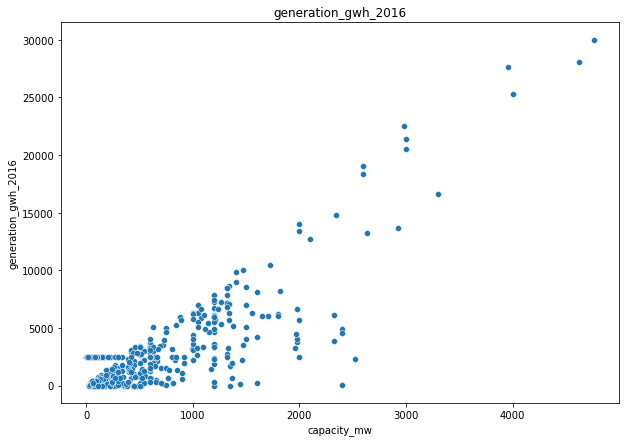

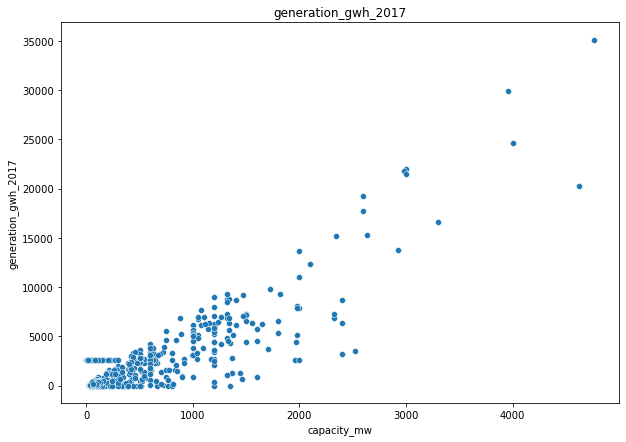

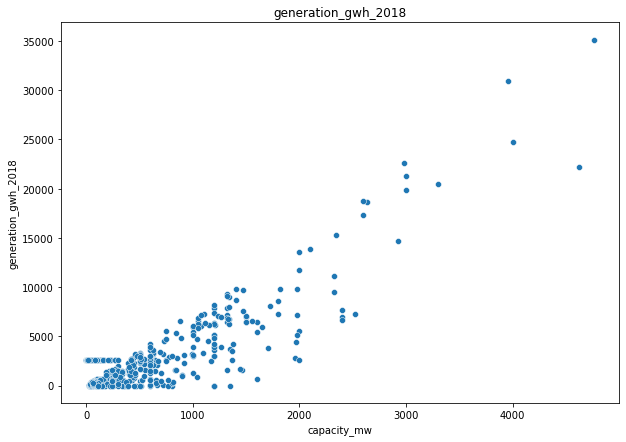

In [138]:
for i in num_columns[1:]:
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df['capacity_mw'],y= df[i], data=df)
    plt.title(i)
    plt.show()

With latitude 20 to 25, longitude 80 to 85 the generation capacity is high.

Power generation is around 1000 to 2000 during 2015-2019.



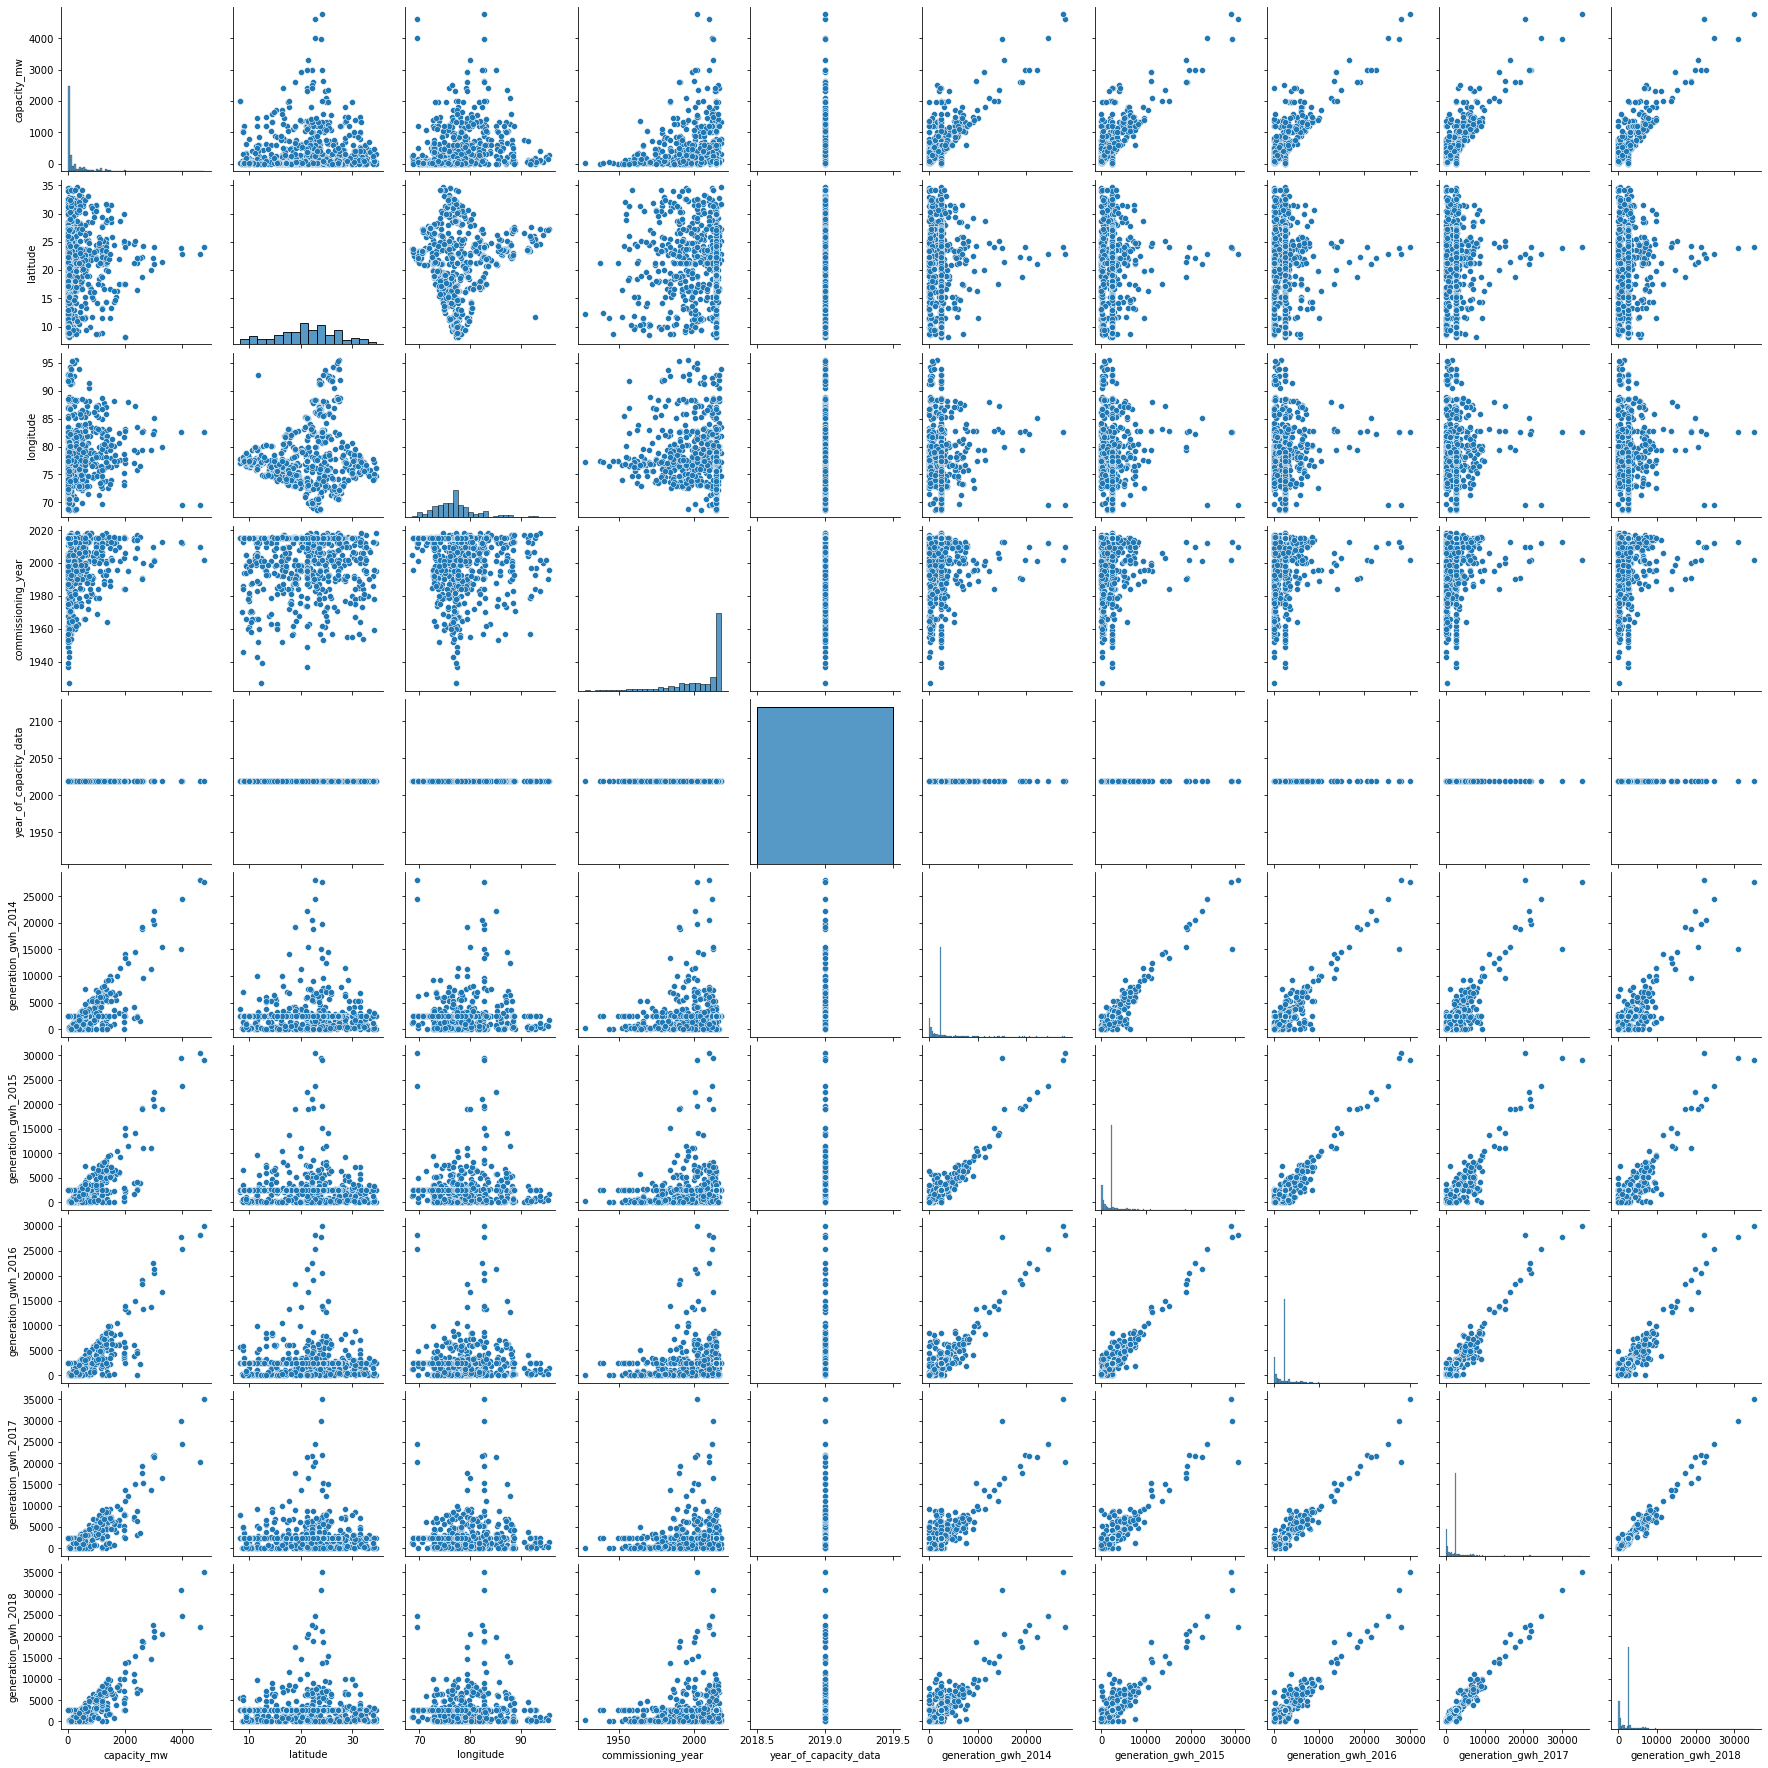

In [28]:
sns.pairplot(df)

The Data contains skewness in it. We shall handle it with Power Transform

# Encode Categorical Columns

In [289]:
LE= LabelEncoder() 

In [290]:
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])

In [291]:
df['primary_fuel']= LE.fit_transform(df['primary_fuel'])
LE.inverse_transform([7,6,5,4,3,2,1,0])

array([7, 6, 5, 4, 3, 2, 1, 0])

# Data Description

In [292]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2004.594267,43.847850,1.733186,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,15.734928,44.642818,0.677151,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,1998.000000,22.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2014.000000,22.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2015.000000,29.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


The columns capacity_mw, latitude, longitude,source have outliers since 75th percentile and maximum values have high difference

# Correlation

In [293]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.004072,-2.421218e-01,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.034519,5.592656e-02,-1.842751e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,-0.159025,-2.393334e-01,2.523426e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.164947,5.361263e-02,-4.832168e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,1.000000,3.222222e-01,-2.599290e-01,NaN,1.100630e-01,1.218816e-01,1.411613e-01,1.413426e-01,1.442491e-01
source,-0.242122,0.055927,-0.239333,0.053613,0.322222,1.000000e+00,-5.057202e-01,NaN,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.259929,-5.057202e-01,1.000000e+00,NaN,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,0.110063,1.917854e-18,-2.966463e-17,NaN,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.121882,-2.160931e-17,-6.339264e-18,NaN,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01


year_of_capacity_data column has nothing to contribute to target or the other variable, so dropping it.

In [294]:
df.drop('year_of_capacity_data', axis=1, inplace=True)

<AxesSubplot:>

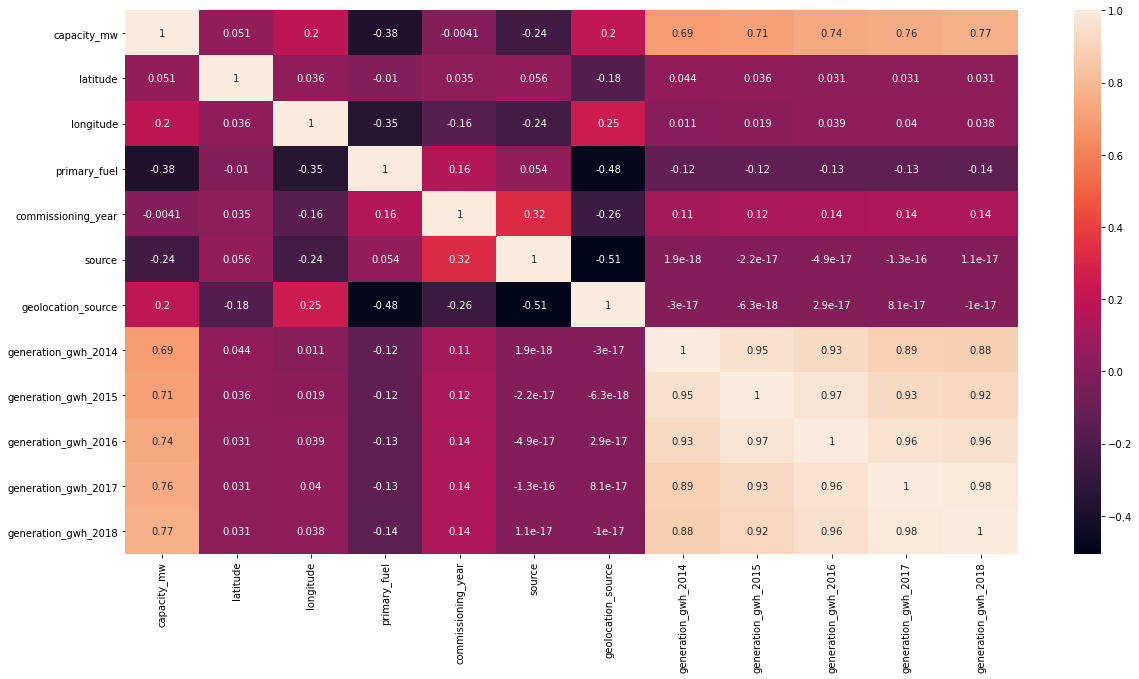

In [145]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

generation with each year is correlated to each other. Source and commisioning year contributes high to the target.

In [295]:
cap_df=df
cap_df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2015.0,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Check For Multicollinearity- VIF

In [296]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
df1=df.drop('primary_fuel', axis=1)

In [298]:
df1

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,2015.0,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,2015.0,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,2015.0,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [299]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [300]:
vif_fun()

,vif_factor,features
0,4.096868,capacity_mw
1,13.900128,latitude
2,286.140023,longitude
3,298.222479,commissioning_year
4,2.901108,source
5,11.040757,geolocation_source
6,20.469795,generation_gwh_2014
7,45.257321,generation_gwh_2015
8,57.911681,generation_gwh_2016
9,65.059322,generation_gwh_2017


commissioning_year and longitude has high collinearity, in which longitude contributes less to the target, so deleting the column

In [301]:
df1.drop('longitude', axis=1, inplace=True)

In [302]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [303]:
vif_fun()

,vif_factor,features
0,3.984731,capacity_mw
1,13.825422,latitude
2,32.953553,commissioning_year
3,2.869170,source
4,10.765787,geolocation_source
5,20.442357,generation_gwh_2014
6,45.211012,generation_gwh_2015
7,57.770875,generation_gwh_2016
8,65.048323,generation_gwh_2017
9,56.320343,generation_gwh_2018


generation_gwh each year is highly correlated to each other, so we shall keep the data for single year.

In [304]:
df1.drop(['generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018'], axis=1, inplace=True)

In [305]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [306]:
vif_fun()

,vif_factor,features
0,2.918477,capacity_mw
1,13.751122,latitude
2,32.560560,commissioning_year
3,2.818360,source
4,10.660340,geolocation_source
5,3.802910,generation_gwh_2014


The columns with multi collinearity is removed. So we shall proceed with skewness removal

# Check For Skewness

In [307]:
df1.skew().sort_values(ascending=False)

generation_gwh_2014    5.035446
capacity_mw            3.123576
source                 1.827373
latitude              -0.149698
commissioning_year    -1.714873
geolocation_source    -2.159841
dtype: float64

generation_gwh_2014 and capacity_mw has high skewness, so we shall handle it with Power Transformation.

In [308]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [309]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[-1.69576688,  1.1594364 ,  0.35818373,  1.5828611 , -2.34540024,
         0.287071  ],
       [ 0.19369368,  0.57903232,  0.743571  ,  2.03665765,  0.39606163,
         0.287071  ],
       [-0.2923371 ,  0.09991208,  0.743571  , -0.47187922,  0.39606163,
         0.287071  ],
       ...,
       [-0.52277344, -0.98053644,  0.743571  , -0.47187922,  0.39606163,
         0.287071  ],
       [ 0.08691496,  0.50893808,  0.743571  ,  0.90476746,  0.39606163,
         0.287071  ],
       [-0.75589054, -1.81390048,  0.743571  , -0.47187922,  0.39606163,
         0.287071  ]])

In [310]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,capacity_mw,latitude,commissioning_year,source,geolocation_source,generation_gwh_2014
0,-1.695767,1.159436,0.358184,1.582861,-2.345400,0.287071
1,0.193694,0.579032,0.743571,2.036658,0.396062,0.287071
2,-0.292337,0.099912,0.743571,-0.471879,0.396062,0.287071
3,0.360998,0.428491,-0.237119,-0.403248,0.396062,-0.864800
4,1.649503,0.109302,0.743571,-0.403248,0.396062,0.537628
...,...,...,...,...,...,...
902,1.593509,-0.817376,0.845530,-0.403248,0.396062,0.287071
903,-1.615576,-1.357110,0.743571,1.211010,-2.530510,0.287071
904,-0.522773,-0.980536,0.743571,-0.471879,0.396062,0.287071
905,0.086915,0.508938,0.743571,0.904767,0.396062,0.287071


In [311]:
df1.skew().sort_values(ascending=False)

generation_gwh_2014    0.123226
capacity_mw            0.022164
latitude              -0.074269
source                -0.214066
commissioning_year    -1.077695
geolocation_source    -2.132728
dtype: float64

In [312]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

In [313]:
skewed_data=df1.skew()
skewed_data

capacity_mw            0.022164
latitude              -0.074269
commissioning_year    -1.077695
source                -0.214066
geolocation_source    -2.132728
generation_gwh_2014    0.123226
dtype: float64

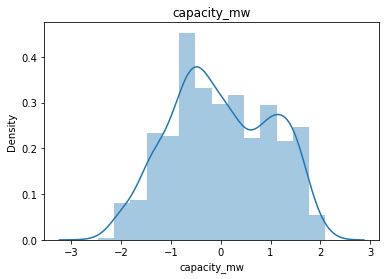

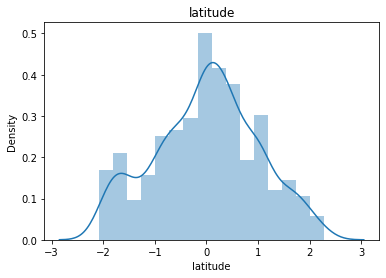

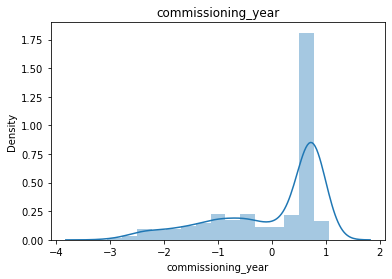

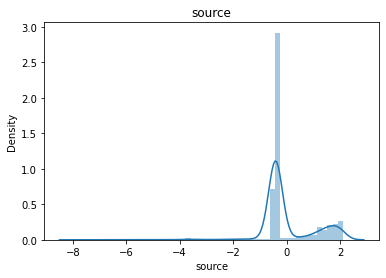

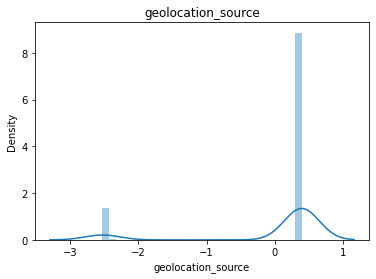

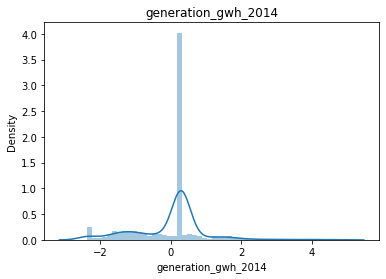

In [314]:
for i in df1.columns:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

Normalization of the curves are not possible, but the skewness is reduced to considerable amount.

In [315]:
df1['primary_fuel']= df['primary_fuel']

In [316]:
df1.shape

(907, 7)

# Check For Outliers

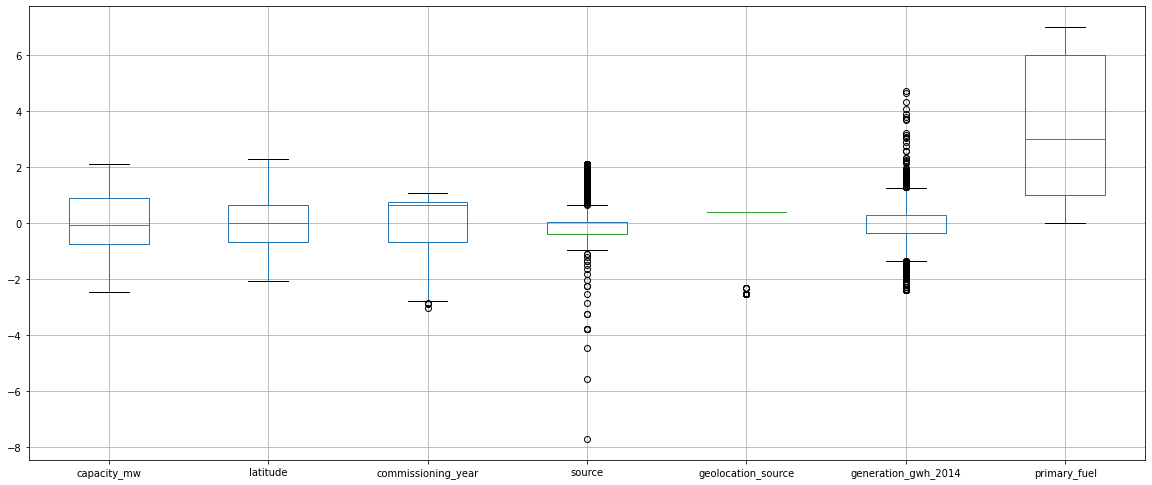

In [317]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Source, generation_gwh has outliers, we shall handle it with zscore

In [318]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.69576688, 1.1594364 , 0.35818373, ..., 2.34540024, 0.287071  ,
        1.22568762],
       [0.19369368, 0.57903232, 0.743571  , ..., 0.39606163, 0.287071  ,
        0.96787724],
       [0.2923371 , 0.09991208, 0.743571  , ..., 0.39606163, 0.287071  ,
        1.66440059],
       ...,
       [0.52277344, 0.98053644, 0.743571  , ..., 0.39606163, 0.287071  ,
        1.66440059],
       [0.08691496, 0.50893808, 0.743571  , ..., 0.39606163, 0.287071  ,
        0.96787724],
       [0.75589054, 1.81390048, 0.743571  , ..., 0.39606163, 0.287071  ,
        1.66440059]])

In [319]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([112, 130, 137, 308, 364, 387, 393, 404, 415, 493, 494, 648, 657,
       695, 721, 726, 728, 786, 808, 880, 888, 894], dtype=int64), array([3, 3, 3, 5, 5, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 3, 3],
      dtype=int64))


In [320]:
z[112][3]

4.488361618171141

In [321]:
df1_new= df1[(z<3).all(axis=1)]

In [322]:
df1_new.shape

(885, 7)

In [323]:
df1.shape

(907, 7)

# Loss Percent

In [324]:
Loss= (907-885)/907*100
Loss

2.4255788313120177

Nearly 2.5% of the data are removed as outliers. The presence of which may give noisy data for training of the dataset

# Spliting the data and Balancing

In [359]:
x= df1.iloc[:,0:-1]
y= df1.iloc[:,-1]

In [360]:
y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data seems to be highly imbalanced, so to balance the dataset we shall use SMOTE

In [361]:
from imblearn.over_sampling import SMOTE

In [362]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [363]:
y1.value_counts()

0    258
2    258
4    258
6    258
1    258
3    258
5    258
7    258
Name: primary_fuel, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with more than 2 classes, we use Classification models to train our data

# Train The Model

In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

DecisionTreeClassifier

In [365]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=.20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc=accuracy_score(ytest,preddtc)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.9007263922518159 on Random_state 43


# To Find the Best Cross Validation Score 

In [366]:
pred_tr= dtc.predict(xtrain)
pred_ts= dtc.predict(xtest)

In [367]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [368]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(dtc,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8396317829457365 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767


At cross fold 3 the cv score is 0.8696705426356589 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767


At cross fold 4 the cv score is 0.8633720930232558 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767


At cross fold 5 the cv score is 0.8764580737676015 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767


At cross fold 6 the cv score is 0.8691860465116279 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767


At cross fold 7 the cv score is 0.8657903839501901 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767


At cross fold 8 the cv score is 0.8667635658914729 and accuracy score for training is 1.0 and the accuracy for testing is 0.8716707021791767



The accuracy score is best at Random State 43, cv is good at cv=5. So we can use this to test the other models

In [369]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=43)

# DecisionTreeClassifier

In [370]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
#print('Score:', dtc.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[0 0 1 0 0 0 0]
 [1 5 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.71      0.83      0.77         6
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.80        20
   macro avg       0.53      0.55      0.54        20
weighted avg       0.76      0.80      0.78        20

Acc_score: 0.8


In [372]:
cr_dtc=cross_val_score(dtc,x1,y1, cv=5)
print('Cross Validation Score of DecisionTreeClassifier is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.8725792801899435


# RandomForestClassifier

In [373]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[0 0 1 0 0 0]
 [1 7 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.88      0.93         8
           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.62      0.65      0.63        20
weighted avg       0.86      0.85      0.85        20

Acc_score: 0.85


In [374]:
cr_rf=cross_val_score(rf,x1,y1, cv=4)
print('Cross Validation Score of RandomForestClassifier is:', cr_rf.mean())

Cross Validation Score of RandomForestClassifier is: 0.9060077519379844


# SVC

In [375]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[0 0 1 0 0 0]
 [1 6 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      0.86      0.86         7
           2       0.00      0.00      0.00         1
           3       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.80        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.80      0.80      0.80        20

Acc_score: 0.8


In [376]:
cr_svc=cross_val_score(svc,x1,y1, cv=4)
print('Cross Validation Score of SVC is:', cr_svc.mean())

Cross Validation Score of SVC is: 0.8086240310077519


# KNN

In [377]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print( confusion_matrix(predknn,ytest))
print( classification_report(predknn,ytest))
print('Acc_score:', accuracy_score(predknn,ytest))

[[0 0 1 0 0 0]
 [1 7 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.88      0.93         8
           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.62      0.65      0.63        20
weighted avg       0.86      0.85      0.85        20

Acc_score: 0.85


In [378]:
cr_knn=cross_val_score(knn,x1,y1, cv=4)
print('Cross Validation Score of KNN is:', cr_knn.mean())

Cross Validation Score of KNN is: 0.8633720930232558


The accuracy Score of SVC is equal to the Cv score. So we shall improve it with Hyper Parameter Tuning

# HyperParameter Tuning With GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV

In [379]:
SVC()

SVC()

In [380]:
parameters={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [1,2,3,4,5],
            'gamma':['scale', 'auto'],
            'cache_size':[100,200,300,400],
            'max_iter': [-1,0,1]}

In [381]:
GCV=GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'cache_size': 100,
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1}

In [382]:
GCV.best_estimator_

SVC(cache_size=100, degree=1)

In [383]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)   

0.8

In [385]:
svc=SVC(cache_size=100, 
        degree=1, 
        gamma= 'scale',
        kernel= 'rbf',
        max_iter= -1)
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[0 0 1 0 0 0]
 [1 6 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      0.86      0.86         7
           2       0.00      0.00      0.00         1
           3       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.80        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.80      0.80      0.80        20

Acc_score: 0.8


The accuracyis nearly 80% after tuning the parameters. So the model is performing well with the dataset without overfitting

# Save The Model

In [388]:
import pickle
filename= 'plant_fuel.pkl'
pickle.dump(svc,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [389]:
x=np.array(ytest)
predicted= np.array(svc.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con[0:20]

,original,Predicted
0,7,7
1,3,3
2,3,2
3,7,7
4,3,3
5,7,7
6,1,1
7,1,3
8,1,1
9,1,1


The predicted results are nearly equal to the actual results. The model gave good prediction with nearly 80% results  

# Target Variable: capacity_mw

In [390]:
cap_df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2015.0,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Check For Multi Collinearity- VIF

In [150]:
df2=cap_df.drop('capacity_mw', axis=1)

In [151]:
df2

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6,2011.0,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,24.7663,74.6090,1,2015.0,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,21.9038,69.3732,7,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2016.0,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,6,2015.0,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,15.2758,75.5811,7,2015.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,24.3500,73.7477,1,2015.0,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [152]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
    vif['features']= df2.columns
    return(vif)

In [153]:
vif_fun()

,vif_factor,features
0,13.955493,latitude
1,308.188472,longitude
2,4.841200,primary_fuel
3,387.436029,commissioning_year
4,3.055399,source
5,14.886607,geolocation_source
6,20.360921,generation_gwh_2014
7,45.038227,generation_gwh_2015
8,57.822351,generation_gwh_2016
9,64.988678,generation_gwh_2017


commissioning_year and longitude has high collinearity, in which commissioning_year contributes less to the target, so deleting the column commissioning_year.

In [154]:
df2.drop('commissioning_year', axis=1, inplace=True)

In [155]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
    vif['features']= df2.columns
    return(vif)

In [156]:
vif_fun()

,vif_factor,features
0,13.451407,latitude
1,42.605312,longitude
2,3.573493,primary_fuel
3,2.523093,source
4,13.377538,geolocation_source
5,20.324736,generation_gwh_2014
6,45.011266,generation_gwh_2015
7,57.714300,generation_gwh_2016
8,64.977898,generation_gwh_2017
9,52.666690,generation_gwh_2018


generation_gwh each year is highly correlated to each other, so we shall keep the data for single year.

In [157]:
df2.drop(['generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'], axis=1, inplace=True)

The columns with multi collinearity is removed. So we shall proceed with skewness removal

# Check For Skewness

In [160]:
df2.skew().sort_values(ascending=False)

generation_gwh_2018    4.937907
source                 1.827373
longitude              1.141881
primary_fuel           0.472251
latitude              -0.149698
geolocation_source    -2.159841
dtype: float64

generation_gwh_2018 and source has high skewness, so we shall handle it with Power Transformation.

In [162]:
from sklearn.preprocessing import power_transform
df2_new= power_transform(df2)

In [163]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2_new= sc.fit_transform(df2_new)
df2_new

array([[ 1.1594364 , -0.95254455,  1.1713128 ,  1.5828611 , -2.34540024,
         0.32193752],
       [ 0.57903232, -0.54497607, -0.99629108,  2.03665765,  0.39606163,
         0.32193752],
       [ 0.09991208, -2.37986379,  1.4415761 , -0.47187922,  0.39606163,
         0.32193752],
       ...,
       [-0.98053644, -0.28081923,  1.4415761 , -0.47187922,  0.39606163,
         0.32193752],
       [ 0.50893808, -0.7963743 , -0.99629108,  0.90476746,  0.39606163,
         0.32193752],
       [-1.81390048,  0.18088946,  1.4415761 , -0.47187922,  0.39606163,
         0.32193752]])

In [164]:
df2=pd.DataFrame(df2_new, columns= df2.columns)
df2

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018
0,1.159436,-0.952545,1.171313,1.582861,-2.345400,0.321938
1,0.579032,-0.544976,-0.996291,2.036658,0.396062,0.321938
2,0.099912,-2.379864,1.441576,-0.471879,0.396062,0.321938
3,0.428491,2.174468,-0.362170,-0.403248,0.396062,-0.771699
4,0.109302,1.117231,-0.996291,-0.403248,0.396062,1.552482
...,...,...,...,...,...,...
902,-0.817376,0.153591,-0.996291,-0.403248,0.396062,-0.716996
903,-1.357110,0.332870,1.171313,1.211010,-2.530510,0.321938
904,-0.980536,-0.280819,1.441576,-0.471879,0.396062,0.321938
905,0.508938,-0.796374,-0.996291,0.904767,0.396062,0.321938


In [165]:
df2.skew().sort_values(ascending=False)

longitude              0.002926
generation_gwh_2018    0.000783
primary_fuel          -0.047067
latitude              -0.074269
source                -0.214066
geolocation_source    -2.132728
dtype: float64

The skewness is reduced to considerable amount.

In [166]:
df2['capacity_mw']= cap_df['capacity_mw']

In [168]:
df2.shape

(907, 7)

# Check For Outliers

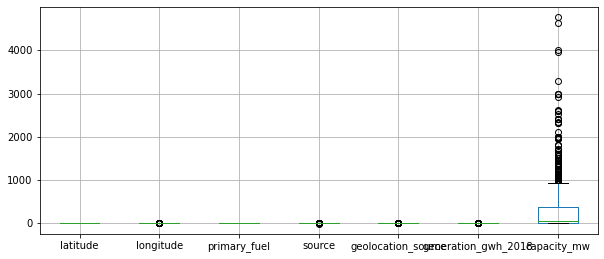

In [171]:
df2.boxplot(figsize=(10,5))
plt.subplots_adjust(bottom=0.25)
plt.show()

Outliers are present in source, longitude, generation_source. We shall handle it with Zscore

In [172]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[1.1594364 , 0.95254455, 1.1713128 , ..., 2.34540024, 0.32193752,
        0.54890755],
       [0.57903232, 0.54497607, 0.99629108, ..., 0.39606163, 0.32193752,
        0.38697729],
       [0.09991208, 2.37986379, 1.4415761 , ..., 0.39606163, 0.32193752,
        0.48667885],
       ...,
       [0.98053644, 0.28081923, 1.4415761 , ..., 0.39606163, 0.32193752,
        0.50990864],
       [0.50893808, 0.7963743 , 0.99629108, ..., 0.39606163, 0.32193752,
        0.41749818],
       [1.81390048, 0.18088946, 1.4415761 , ..., 0.39606163, 0.32193752,
        0.52516908]])

In [173]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([ 15,  15, 112, 130, 137, 143, 147, 209, 308, 363, 364, 364, 375,
       387, 393, 404, 415, 482, 493, 493, 494, 494, 648, 648, 657, 657,
       695, 695, 726, 726, 767, 786, 786, 788, 808, 808, 880, 880, 888,
       894], dtype=int64), array([5, 6, 3, 3, 3, 6, 6, 6, 6, 6, 5, 6, 6, 3, 3, 3, 3, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 3, 3], dtype=int64))


In [174]:
z[15][5]

3.167729511998566

In [175]:
df2_new= df2[(z<3).all(axis=1)]

In [176]:
df2.shape

(907, 7)

In [177]:
df2_new.shape

(878, 7)

In [178]:
#Loss percent
Loss= (907-878)/907*100
Loss

3.197353914002205

Nearly 3% of the data are removed as outliers. The presence of which may give noisy data for training of the dataset

In [181]:
df2_new

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2018,capacity_mw
0,1.159436,-0.952545,1.171313,1.582861,-2.345400,0.321938,2.5
1,0.579032,-0.544976,-0.996291,2.036658,0.396062,0.321938,98.0
2,0.099912,-2.379864,1.441576,-0.471879,0.396062,0.321938,39.2
3,0.428491,2.174468,-0.362170,-0.403248,0.396062,-0.771699,135.0
4,0.109302,1.117231,-0.996291,-0.403248,0.396062,1.552482,1800.0
...,...,...,...,...,...,...,...
902,-0.817376,0.153591,-0.996291,-0.403248,0.396062,-0.716996,1600.0
903,-1.357110,0.332870,1.171313,1.211010,-2.530510,0.321938,3.0
904,-0.980536,-0.280819,1.441576,-0.471879,0.396062,0.321938,25.5
905,0.508938,-0.796374,-0.996291,0.904767,0.396062,0.321938,80.0


# Spliting the data and Balancing

In [421]:
x= df2.iloc[:,0:-1]
y= df2.iloc[:,-1]

In [422]:
y.value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

Since the Target variable is continous, we use Regression models to train our data

# Train The Model

In [423]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

# TO Find Best Random State

In [424]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    acc= r2_score(ytest,predlr)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.7688895389268403 on Random_state 80


In [425]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    dtc=DecisionTreeRegressor()
    dtc.fit(xtrain,ytrain)
    preddtc= dtc.predict(xtest)
    acc= r2_score(ytest,preddtc)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.9797111339371981 on Random_state 37


# To Find Best CV_Score

In [426]:
pred_tr= dtc.predict(xtrain)
pred_ts= dtc.predict(xtest)

In [427]:
train_score= r2_score(ytrain,pred_tr)
test_score= r2_score(ytest,pred_ts)

In [428]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_score} and the accuracy for testing is {test_score}")
    print("\n")

At cross fold 2 the cv score is 0.3592447874206783 and accuracy score for training is 0.9997157375193766 and the accuracy for testing is 0.7899068020896965


At cross fold 3 the cv score is 0.3895611240910779 and accuracy score for training is 0.9997157375193766 and the accuracy for testing is 0.7899068020896965


At cross fold 4 the cv score is 0.40387066325674803 and accuracy score for training is 0.9997157375193766 and the accuracy for testing is 0.7899068020896965


At cross fold 5 the cv score is 0.4041514435511225 and accuracy score for training is 0.9997157375193766 and the accuracy for testing is 0.7899068020896965


At cross fold 6 the cv score is 0.38644124213298775 and accuracy score for training is 0.9997157375193766 and the accuracy for testing is 0.7899068020896965


At cross fold 7 the cv score is 0.4131772549789671 and accuracy score for training is 0.9997157375193766 and the accuracy for testing is 0.7899068020896965


At cross fold 8 the cv score is 0.4106270901963056

The r2 score is high with random State 37, cv=7. Lets check with the other models.

In [429]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=37)

# LinearRegression

In [430]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('RMSE=',np.sqrt(mean_squared_error(ytest,predlr)))
print('MBE=', mean_absolute_error(ytest,predlr))

R2= 0.6405464617885903
RMSE= 363.24178089939636
MBE= 269.4231075213873


In [431]:
cr_lr=cross_val_score(lr,x,y, cv=7)
print('Cross Validation Score of LinearRegression is:', cr_lr.mean())

Cross Validation Score of LinearRegression is: 0.4131772549789671


R2 score and cv score are less. So we shall train with the other models

# DecisionTreeRegressor

In [432]:
dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error',np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 0.9997133191002692
root_mean_squared_error 111.05145429034238
mean_absolute_error: 59.425
r2_score: 0.9659831311842707


In [433]:
cr_dtc=cross_val_score(dtc,x,y, cv=7)
print('Cross Validation Score of DecisionTreeRegressor is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.7023448291421247


There seems to be much difference in r2 and Cv score. So we shall go with other models

# RandomForestRegressor

In [434]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root_mean_squared_error 106.47218362620056
mean_absolute_error: 61.18846107142855
Rf Score 0.9765789918213246
r2_score: 0.9728169503787901


In [435]:
cr_rf=cross_val_score(rf,x,y, cv=7)
print('Cross Validation Score of RandomForestRegressor is:', cr_rf.mean())

Cross Validation Score of RandomForestRegressor is: 0.8286842565154268


R2 score and Cv score difference is considerably less than other models, so we shall tune them with Hyper Parameter

# SVR

In [436]:
svc=SVR(kernel='linear')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root_mean_squared_error 552.1100937467351
mean_absolute_error: 250.50018478475423
Score: 0.08303440112046923
r2_score: -20.701504573212052


# HyperParameter Tuning With GridSearchCV

In [408]:
RandomForestRegressor()

RandomForestRegressor()

In [235]:
parameters={'criterion': ["squared_error", "absolute_error", "poisson"],
            'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'max_depth':[3,4,5,6],
            'min_samples_split':[2,3,4]}

In [236]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=6, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [229]:
GCV.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=3)

In [231]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.908482769395134

In [438]:
rf=RandomForestRegressor(criterion='absolute_error',
                         max_depth=6,
                         min_samples_leaf=2,
                         min_samples_split=3, 
                         max_features= 'auto')
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 102.02091364469499
mean_absolute_error: 55.26667749999999
Rf Score 0.9062957101234124
r2_score: 0.9748502260140008


The accuracyis nearly 97% after tuning the parameters. So the model is performing well with the dataset

# Save The Model

In [439]:
import pickle
filename= 'plant_capacity.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [440]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,9.0,6.955000
1,520.0,177.110875
2,24.0,22.345000
3,49.6,32.017750
4,45.0,62.482000
5,2600.0,2829.850000
6,1.0,6.197000
7,14.4,17.760750
8,60.0,164.576025
9,1.0,27.671000


The predicted values are 88% near to the original values. The model provides 88% accuracy.